<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-422-salleh/Exercises/day-13/AI-Ethics/AI-Ethics-Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Set: Data Ethics in Smart City IoT Sensor Data Management

Scenario

You are part of a Smart City analytics team responsible for collecting and analyzing IoT sensor data to improve urban safety, traffic flow, and environmental monitoring. The city council wants to ensure ethical handling of data — from collection and consent to governance, privacy, and compliance.

You will work with a synthetic dataset simulating vehicle tracking sensors, air quality monitors, and some citizen-reported incidents.

Dataset Setup

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 800

consent_types = ["explicit", "implicit", "none"]
districts = ["Downtown", "Suburban", "Industrial", "Green Zone"]

data = pd.DataFrame({
    "Device_ID": range(1, n+1),
    "Owner_Age": np.random.randint(18, 80, n),
    "District": np.random.choice(districts, n),
    "Consent_Type": np.random.choice(consent_types, n, p=[0.6, 0.3, 0.1]),
    "Vehicle_Count": np.random.randint(0, 200, n),
    "Avg_Speed": np.round(np.random.uniform(10, 80, n), 1),
    "Air_Quality_Index": np.random.randint(10, 300, n),
    "Reported_Incident": np.random.choice([0, 1], n, p=[0.85, 0.15])
})

data.head()

,Device_ID,Owner_Age,District,Consent_Type,Vehicle_Count,Avg_Speed,Air_Quality_Index,Reported_Incident
0,1,56,Green Zone,implicit,171,21.6,48,0
1,2,69,Downtown,explicit,1,71.7,25,0
2,3,46,Green Zone,implicit,101,39.9,31,0
3,4,32,Industrial,explicit,34,21.4,222,0
4,5,60,Downtown,implicit,97,10.9,158,0


#Exercises

1. Data Collection, Privacy & Consent

    Task 1.1: Write a function to filter dataset to only keep records with valid consent for analytics.\
    Task 1.2: Compare size before and after consent filtering and discuss trade‑offs.



In [2]:
# Filter function: keep only explicit or implicit consent
def filter_valid_consent(df):
    valid = df[df["Consent_Type"].isin(["explicit", "implicit"])]
    return valid

valid_data = filter_valid_consent(data)

print(f"Before filtering: {len(data)} records")
print(f"After filtering: {len(valid_data)} records")

Before filtering: 800 records
After filtering: 723 records


Explanation: Filtering ensures legal and ethical use of data, but may result in loss of sample size.

2. Implicit vs Explicit Consent

    Task 2.1: Count and plot proportion of explicit, implicit, and none.\
    Task 2.2: Discuss how implicit consent might be risky in IoT sensor deployments.


Consent_Type
explicit    480
implicit    243
none         77
Name: count, dtype: int64


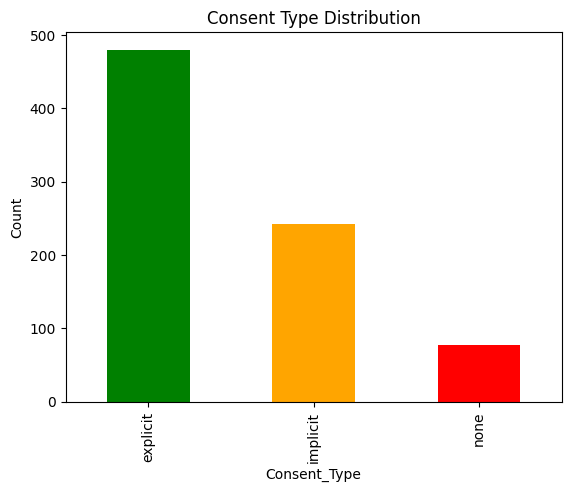

Discussion: Implicit consent in IoT is risky since users might not be aware of data collection, leading to potential legal issues.


In [3]:
import matplotlib.pyplot as plt

consent_counts = data["Consent_Type"].value_counts()
print(consent_counts)

consent_counts.plot(kind="bar", title="Consent Type Distribution", color=['green','orange','red'])
plt.ylabel("Count")
plt.show()

print("Discussion: Implicit consent in IoT is risky since users might not be aware of data collection, leading to potential legal issues.")

3. Bias in Data

    Task 3.1: Check if Reported_Incident rates differ significantly by District.\
    Task 3.2: Identify possible causes (sensor density, demographic differences) and how to correct bias.


District
Downtown      0.120930
Green Zone    0.129213
Industrial    0.115000
Suburban      0.135266
Name: Reported_Incident, dtype: float64


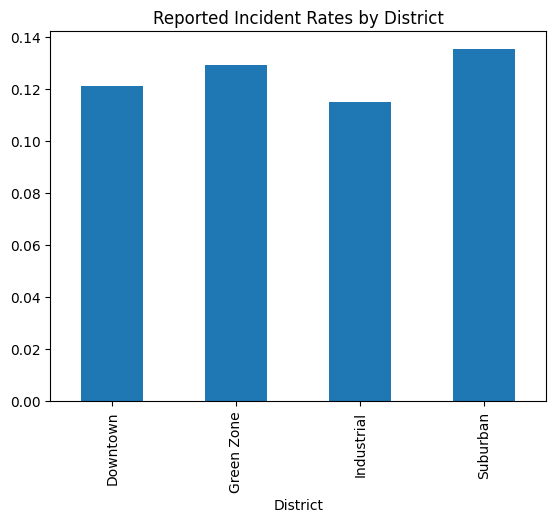

Bias observation: If certain districts have much higher/lower rates, this may be due to uneven sensor placement or socio-economic factors.


In [4]:
incident_rates = data.groupby("District")["Reported_Incident"].mean()
print(incident_rates)

incident_rates.plot(kind="bar", title="Reported Incident Rates by District")
plt.show()

print("Bias observation: If certain districts have much higher/lower rates, this may be due to uneven sensor placement or socio-economic factors.")



4. Data Minimization

    Task 4.1: Select only the necessary columns for traffic congestion analysis, removing unrelated personal or sensitive attributes.\
    Task 4.2: Explain benefits & risks of minimization.


In [5]:
traffic_data = data[["District", "Vehicle_Count", "Avg_Speed"]]
traffic_data.head()

print("We removed personal and unrelated attributes. This reduces privacy risk and unnecessary exposure of sensitive info.")

We removed personal and unrelated attributes. This reduces privacy risk and unnecessary exposure of sensitive info.


5. Anonymization & Pseudonymization

    Task 5.1: Remove Device_ID or replace with hashed pseudonym.\
    Task 5.2: Test whether you can still link records across datasets.


6. De-Anonymization Risks

    Task 6.1: Create an auxiliary dataset with Owner_Age + District.\
    Task 6.2: Attempt a simple join to re-identify pseudonymized records and measure percentage matched.


7. Data Governance & Stewardship

    Task 7.1: Create a data access control table defining roles (Admin, Analyst, Public).\
    Task 7.2: Outline responsibilities of a Data Steward for this smart city project.


8. Data Quality & Lineage

    Task 8.1: Implement a basic data quality report: missing values, out-of-range Air_Quality_Index.\
    Task 8.2: Create a transformation log tracking each processing step.


9. Ethical Data Sharing

    Task 9.1: Build a sharable, aggregated version of the dataset by district (no personal info).\
    Task 9.2: Define rules for approving or denying sharing requests.


10. Monitoring & Compliance

    Task 10.1: Write a compliance check that:
        Alerts if consent compliance ratio <90%
        Alerts if Reported_Incident rate disparity by district >0.15
    Task 10.2: Document escalation steps if an alert is triggered.



Bonus

    Apply k-anonymity checks to District + Age combination.
    Simulate real-time consent withdrawal and show how to handle it in downstream analytics.
